In [16]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### A18.16(b)

In [32]:


n = 2
m = 50
U = np.array([[1.824183228637652032e+00, 1.349093690455489103e+00, 6.966316403935147727e-01, 7.599387854623529392e-01, 2.388321695850912363e+00, 8.651370608981923116e-01, 1.863922545015865406e+00, 7.099743941474848663e-01, 6.005484882320809570e-01, 4.561429569892232472e-01, 5.328296545713475663e-01, 2.138547819234526415e+00, 1.906676474276197464e+00, 1.015547309536922516e+00, 8.765948388006337133e-01, 1.648147347399247842e+00, 1.027902202451572045e+00, 2.145586297520478691e+00, 1.793440421753045744e+00, 1.020535583041398908e+00, 8.977911075271942654e-01, 1.530480229262339398e+00, 2.478088034137528872e-01, 2.617415807793897820e+00, 2.081978553098443374e+00, 1.891226687205936452e+00, 8.222497927065576251e-01, 5.803514604868882376e-01, 1.158670193449639063e+00, 6.016685032455900695e-01, 5.605410828151705660e-01, 2.508815467550573164e+00, 2.230201413385580977e+00, 1.170848897912992514e+00, 2.256355929901105561e+00, 6.686991510936428629e-01, 2.040269595792217672e+00, 3.634166812924328749e-01, 5.418647611079159265e-01, 6.631470058399455692e-01, 4.286142597532469622e-01, 2.155925078996823618e+00, 2.379380016960549682e+00, 6.343212414048013947e-01, 1.469076407947448981e+00, 1.225322035289937439e+00, 1.467602887401966871e+00, 9.345319187253748883e-01, 1.985592768641736505e+00, 2.106896115090134636e+00],
[-9.644136284187876385e-01, 1.069547315003422927e+00, 6.733229334437943470e-01, 7.788072961810316164e-01, -9.467465278344706636e-01, -8.591303443863639311e-01, 1.279527420871080956e+00, 5.314829019311283487e-01, 6.975676079749143499e-02, -4.641873429414754559e-01, -2.094571396598311763e-01, -8.003479827938377866e-01, 6.135280782546607137e-01, -9.961307468791747999e-01, -8.765215480412106297e-01, 9.655406812422813179e-01, 1.011230180540185541e+00, 6.105416770440197372e-01, 9.486552370654932620e-01, -9.863592657836954825e-01, 7.695327845100754516e-01, -1.060072365810699413e+00, -4.041043465424410952e-01, -2.352952920283236105e-01, 7.560391050507236921e-01, -9.454246095204003053e-01, -5.303145312191936966e-01, 5.979590038743245461e-01, -1.154309511133019717e+00, -6.123184171955468047e-01, -1.464683782538583889e-01, -1.839128688968104386e-01, 4.250070477845909744e-01, 8.861864983476224200e-01, 3.927648421593328276e-01, -6.726102374256350824e-01, -1.047252884197514833e+00, 1.825096825995130845e-01, -4.482373962742914886e-01, 5.115625649313135792e-01, 7.846201103116770548e-02, 6.006325432819290544e-01, -5.710733714464664157e-01, 4.725559971890586075e-01, -8.440290321502940118e-01, -1.003920890712479475e+00, -1.067089412136528637e+00, 7.909281966910661765e-01, -1.059509163675931065e+00, -7.136351632325785843e-01]
])

In [34]:


alpha = np.sum(U**2, axis=0)  
c = cp.Variable(2)
t = cp.Variable()

residuals = 2*c[0]*U[0, :] + 2*c[1]*U[1, :] + t - alpha
objective = cp.sum_squares(residuals)

prob = cp.Problem(cp.Minimize(objective))
prob.solve()

2.903828425976946

In [36]:

c_opt = c.value
t_opt = t.value
r_sq = np.sum(c_opt**2) + t_opt

if r_sq < 0:
    print("Warning: Negative radius-squared computed. Setting radius to 0.")
    r_opt = 0.0
else:
    r_opt = np.sqrt(r_sq)

print("Optimal center (c*):", c_opt)
print("Optimal radius (r*):", r_opt)


Optimal center (c*): [ 1.47590677 -0.04404696]
Optimal radius (r*): 1.034216544428155


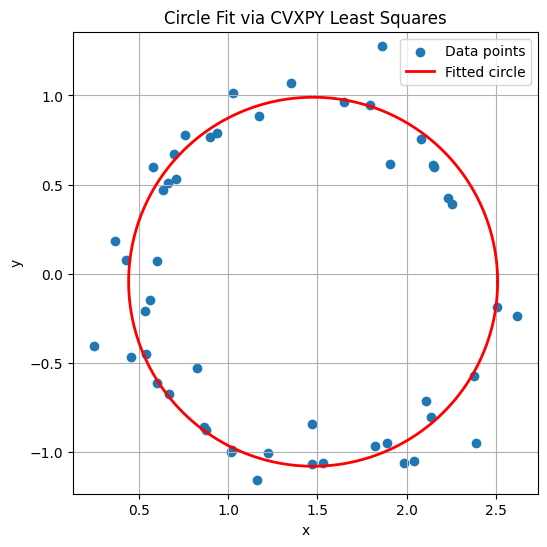

In [37]:
theta = np.linspace(0, 2*np.pi, 200)
circle_x = c_opt[0] + r_opt * np.cos(theta)
circle_y = c_opt[1] + r_opt * np.sin(theta)

plt.figure(figsize=(6,6))
plt.scatter(U[0, :], U[1, :], label='Data points')
plt.plot(circle_x, circle_y, 'r-', linewidth=2, label='Fitted circle')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Circle Fit via CVXPY Least Squares")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### A14.4

In [17]:

n = 10 # number of variables
k = 6  # number of designs

# component widths from known designas
# each column of W is a different design
W =([[ 1.8381,  1.5803, 12.4483,  4.4542,  6.5637,  5.8225],
    [ 1.0196,  3.0467, 18.4965,  3.6186,  7.6979,  2.3292],
    [ 1.6813,  1.9083, 17.3244,  4.677 ,  4.6581, 27.0291],
    [ 1.3795,  2.625 , 14.6737,  4.1361,  7.161 ,  7.5759],
    [ 1.8318,  1.4526, 17.2696,  3.7408,  2.2107, 10.3642],
    [ 1.5028,  3.0937, 14.9034,  4.4055,  7.8582, 20.5204],
    [ 1.7095,  2.1351, 10.1296,  4.0931,  2.9001,  9.9634],
    [ 1.4289,  3.58  ,  9.3459,  3.8898,  2.7663, 15.1383],
    [ 1.3046,  3.561 , 10.1179,  4.3891,  7.1302,  3.8139],
    [ 1.1897,  2.7807, 13.0112,  4.2426,  6.1611, 29.6734]])
W = np.array(W)

(W_min, W_max) = (1.0, 30.0)

# objective values for the different designs
# entry j gives the objective for design j
P = np.array([ 29.0148,  46.3369, 282.1749,  78.5183, 104.8087, 253.5439])
D = np.array([15.9522, 11.5012,  4.8148,  8.5697,  8.087 ,  6.0273])
A = np.array([ 22.3796,  38.7908, 204.1574,  62.5563,  81.2272, 200.5119])

# specifications
(P_spec, D_spec, A_spec) = (60.0, 10.0, 50.0)

In [18]:

logP_spec = np.log(P_spec)
logA_spec = np.log(A_spec)
logD_spec = np.log(D_spec)

logP = np.log(P)
logA = np.log(A)
logD = np.log(D)

X = np.log(W)
theta = cp.Variable(6, nonneg=True)

constraints = [
    cp.sum(theta) == 1,
    theta.T @ logP <= logP_spec,
    theta.T @ logA <= logA_spec,
    theta.T @ logD <= logD_spec
]

prob = cp.Problem(cp.Minimize(0), constraints)
prob.solve(solver = cp.ECOS)



0.0

In [19]:
theta_val = theta.value
x = X @ theta_val
w = np.exp(x)


In [23]:

print("The circuit design found corresponds to:")
print(f" \tw= {np.round(w, 4)}")
print(f" \tx= {np.round(x, 4)}")
print("Check each constraint in normal (exponentiated) space:")

# theta^T P = exp(theta^T logP), and we want that ~ P_spec
computed_P = np.exp(logP @ theta_val)
computed_A = np.exp(logA @ theta_val)
computed_D = np.exp(logD @ theta_val)

print(f"P = {np.round(computed_P, 4)} (target = {P_spec})")
print(f"A = {np.round(computed_A, 4)} (target = {A_spec})")
print(f"S = {np.round(computed_D, 4)} (target = {D_spec})")

# Optional: print final status
print()
print(f"Problem status: {prob.status}")
print(f"Objective value: {prob.value}")

The circuit design found corresponds to:
 	w= [2.6386 3.2807 2.9693 3.2662 2.3243 3.6653 2.9298 3.6857 3.894  3.3972]
 	x= [0.9702 1.1881 1.0883 1.1836 0.8434 1.2989 1.0749 1.3045 1.3594 1.223 ]
Check each constraint in normal (exponentiated) space:
P = 59.9112 (target = 60.0)
A = 48.865 (target = 50.0)
S = 9.9927 (target = 10.0)

Problem status: optimal
Objective value: 0.0


In [11]:
def compute_gradient(c, x):
    return c - 1 / x

def compute_hessian(x):
    return np.diag(1 / x**2)

def residuals(A, b, c, x, nu):
    dual_residual = compute_gradient(c, x) + A.T @ nu
    primal_residual = A @ x - b
    return np.concatenate([dual_residual, primal_residual])

def infeasible_newton(A, b, c, x0, max_iter=100, eps=1e-6, alpha=0.2, beta=0.5):
    assert np.all(x0 > 0), "Provided x0 must be positive"

    m, n = A.shape
    nu0 = np.zeros(m)
    x_iter = x0.copy()
    nu_iter = nu0.copy()
    resid = residuals(A, b, c, x0, nu0)
    residuals_norm = [np.linalg.norm(resid)]
    i = 0

    while (i < max_iter) & (residuals_norm[-1] > eps):
        try:
            H = compute_hessian(x_iter)
            block_matrix = np.block([[H, A.T], [A, np.zeros((m, m))]])
            delta_y = np.linalg.solve(block_matrix, -resid)
        except:
            print("Error: the case is unbounded")
            return x0, nu0, []

        delta_x = delta_y[:n]
        delta_nu = delta_y[n:]

        t = 1.0

        while np.any(x_iter + t * delta_x <= 0):
            t *= beta
        while np.linalg.norm(residuals(A, b, c, x_iter + t * delta_x, nu_iter + t * delta_nu)) > (1 - alpha * t) * residuals_norm[-1]:
            t *= beta

        x_iter += t * delta_x
        nu_iter += t * delta_nu
        resid = residuals(A, b, c, x_iter, nu_iter)
        residuals_norm.append(np.linalg.norm(resid))
        i += 1

    if residuals_norm[-1] > eps:
        print("WARNING: algorithm did not converge, last residual", residuals_norm[-1])

    return x_iter, nu_iter, residuals_norm

In [12]:
# Generate a feasible problem that is bounded below

m = 30
n = 40

np.random.seed(seed=16)
c = np.random.random(n)
A = 10 * np.random.random((m, n))
p = np.random.random(n)
b = A @ p


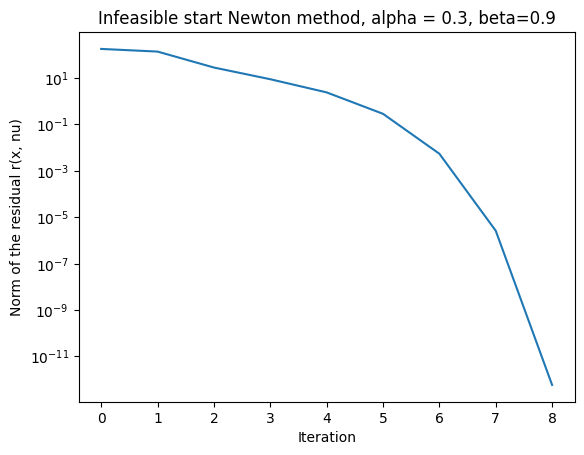

In [13]:

x0 = np.random.random(n)
nu = np.random.random(m)
alpha = 0.3
beta = 0.9

tol = 1e-10
max_iter = 50

x_iter, nu_iter, residuals_norm = infeasible_newton(A, b, c, x0, max_iter=100, eps=1e-6, alpha=0.2, beta=0.5)

plt.yscale('log')
plt.plot(np.arange(len(residuals_norm)), residuals_norm)
plt.xlabel("Iteration")
plt.ylabel("Norm of the residual r(x, nu)")
plt.title(f"Infeasible start Newton method, alpha = {alpha}, beta={beta}")
plt.show()





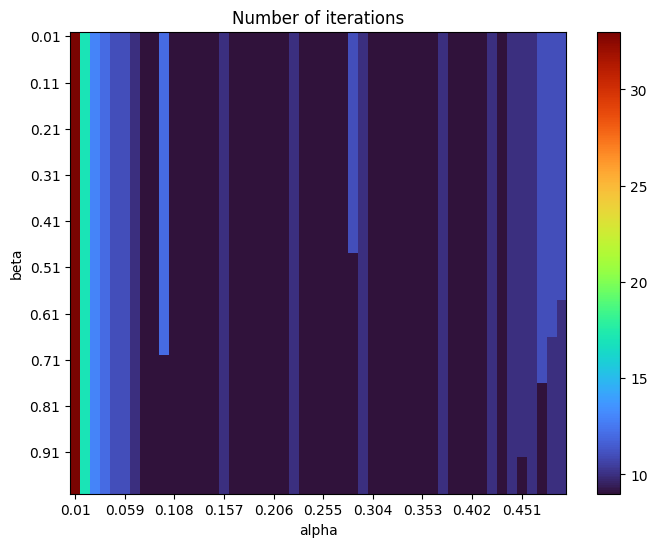

In [14]:
k = 50
n_iter_matrix = np.zeros((k, k), dtype=int)
alpha_values = np.around(np.linspace(0.01, 0.49, k), 3)
beta_values = np.around(np.linspace(0.01, 0.99, k), 3)

for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        _, _, residuals_norm = infeasible_newton(A, b, c, x0, max_iter=100, eps=1e-6, alpha=alpha, beta=beta)
        n_iter_matrix[i, j] = len(residuals_norm)

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(n_iter_matrix, cmap='turbo')
ax.set(xlabel="alpha", ylabel="beta", title="Number of iterations")
plt.xticks(range(0, k, 5), alpha_values[::5])
plt.yticks(range(0, k, 5), beta_values[::5])
ax.set_aspect("auto")
fig.colorbar(img)
plt.show()

The required number of iterations depends on Alpha, but only on Beta when Beta is close to 1. The only case which did not converge in less than 50 steps happened with Beta around 1 and Alpha 0.01.